In [148]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA






In [149]:
from warnings import simplefilter

# ignore all warnings
simplefilter(action='ignore')

In [150]:
trainData = pd.read_csv("TrainingDataMulti.csv", sep=",",header=None)
testData = pd.read_csv("TestingDataMulti.csv", sep=",",header=None)

In [151]:
df_train = pd.DataFrame(data = trainData)
df_test = pd.DataFrame(data = testData)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.2, random_state=42
)
X_train.shape


(4800, 128)

In [153]:
pipe =  RandomForestClassifier()
pipe.fit(X_train, y_train)


# Finally, we can evaluate the model's performance on the test set
SVM_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(SVM_accuracy)) 

Test set accuracy: 0.95


In [154]:
scaler = StandardScaler()
X_TrainScaled= scaler.fit_transform(X_train)
X_TestScaled= scaler.transform(X_test)


In [155]:
pca = PCA(n_components=2)  # You can change the number of components here

X_TrainPCA= pca.fit_transform(X_TrainScaled)
X_TestPCA= pca.transform(X_TestScaled)

X_TrainPCA.shape

(4800, 2)

In [156]:
pipe =  RandomForestClassifier()
pipe.fit(X_TrainPCA, y_train)


# Finally, we can evaluate the model's performance on the test set
SVM_accuracy = pipe.score(X_TestPCA, y_test)
print("Test set accuracy: {:.2f}".format(SVM_accuracy)) 

Test set accuracy: 0.79


In [157]:
X_train=df_train.iloc[:,:-1]
y_train=df_train.iloc[:,-1]
X_test=pd.DataFrame(data = testData)

In [158]:
scaler = StandardScaler()
X_TrainScaled= scaler.fit_transform(X_train)
X_TestScaled= scaler.transform(X_test)

In [159]:
pca = PCA(n_components=2)  # You can change the number of components here

X_TrainPCA= pca.fit_transform(X_TrainScaled)
X_TestPCA= pca.transform(X_TestScaled)

X_TrainPCA.shape

(6000, 2)

In [160]:
rfc = RandomForestClassifier()
rfc.fit(X_TrainPCA, y_train)
print(rfc.score(X_TrainPCA,y_train))

1.0


In [161]:
preds = rfc.predict(X_TestPCA)

In [162]:
preds

array([2, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 0,
       1, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 2, 2, 1, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [163]:
pps = rfc.predict_proba(X_TestPCA)

In [164]:
con = []
for y in pps:
    con.append(max(y))
avgCon = sum(con) / len(con)
print(con,sep=' ')
print("average confindence",avgCon)

[0.76, 0.58, 0.57, 0.62, 0.61, 0.54, 0.81, 0.81, 0.85, 0.85, 0.59, 0.99, 0.97, 0.96, 0.97, 0.97, 0.9, 0.49, 0.8, 0.77, 0.75, 0.65, 0.98, 0.96, 0.96, 0.97, 0.85, 0.91, 0.91, 0.66, 0.57, 0.56, 0.55, 1.0, 1.0, 1.0, 0.95, 0.95, 0.78, 0.87, 0.85, 0.71, 0.55, 0.94, 0.64, 0.6, 0.56, 0.56, 0.5, 0.47, 0.4, 0.65, 0.57, 0.83, 0.63, 0.67, 0.61, 0.94, 0.93, 0.73, 0.51, 0.42, 0.42, 0.42, 0.5, 0.5, 0.9, 0.64, 0.74, 0.94, 0.99, 0.54, 0.39, 0.47, 0.47, 0.51, 0.72, 0.71, 0.59, 0.37, 0.36, 0.41, 0.68, 0.73, 0.94, 0.93, 0.69, 0.76, 0.83, 0.51, 0.55, 0.73, 0.62, 0.61, 0.71, 0.82, 0.66, 0.56, 0.62, 0.6]
average confindence 0.7064999999999998


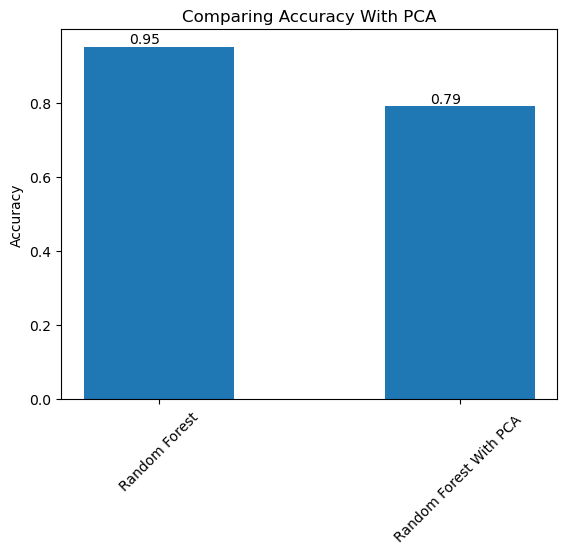

In [166]:
x_axis = ["Random Forest", "Random Forest With PCA "]
y_axis = [0.95,0.79]
plt.bar(x_axis, y_axis, width = 0.5)
plt.title('Comparing Accuracy With PCA' )
plt.ylabel('Accuracy')
for i, v in enumerate(y_axis):
    plt.text(i-0.1, v+0.01, "{:.3}".format(v))
plt.xticks(rotation=45)
plt.show()